In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [7]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import copy

In [26]:
dir_github        = Path(r'D:\RH_local\github').resolve()

dir_analysisFiles = Path(r'D:\RH_local\data\scanimage data\round 5 experiments\mouse 2_6\20210410_test\analysis_lastNight').resolve()


path_spks      = dir_analysisFiles / 'spks_cas.npy'
path_spksCas_params = dir_analysisFiles / 'spksCas_params.pkl'


dir_save       =  copy.copy(dir_analysisFiles)
path_save = dir_save / 'weights_dayN'

In [27]:
import sys
sys.path.append(str(dir_github))

%load_ext autoreload
%autoreload 2

from basic_neural_processing_modules import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
DEVICE = torch_helpers.set_device(use_GPU=True)

device: 'cuda'


In [29]:
iscell = pickle_helpers.simple_load(path_spksCas_params)['iscell_spksCas']
spks = np.load(path_spks)

In [33]:
pc_components, pc_scores, _, pc_evr = decomposition.torch_pca(
    spks.T, 
    device=DEVICE, 
    mean_sub=True, 
    zscore=False, 
    rank=100, 
    return_cpu=True, 
    return_numpy=True
)

<IPython.core.display.Javascript object>


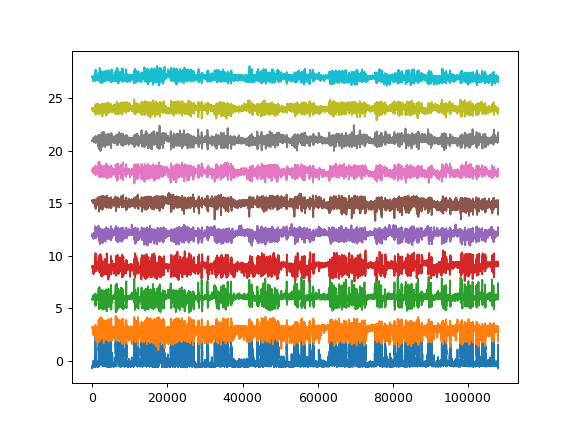

In [34]:
%matplotlib notebook
plt.figure()
plt.plot(pc_scores[:,:10] + np.arange(0,10)*3);

In [35]:
PC_toUse = 2

weights = pc_components[:, PC_toUse-1]

In [36]:
weights_dayN = {
    "weights": weights,
    "iscell_custom": iscell,
    "PC_toUse": PC_toUse
}


F = scipy.io.savemat(path_save.with_suffix('.mat') , weights_dayN)

np.save(path_save.with_suffix('.npy') , weights_dayN)